In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Get data from API
response1 = requests.get("https://api.covid19api.com/country/singapore/status/confirmed")
response2 = requests.get("https://api.covid19api.com/country/singapore/status/deaths")
response3 = requests.get("https://api.covid19api.com/country/singapore/status/recovered")

In [3]:
#Process json data
json1 = response1.json()
json2 = response2.json()
json3 = response3.json()
confirmed = pd.DataFrame.from_dict(json1)
deaths = pd.DataFrame.from_dict(json2)
recovered = pd.DataFrame.from_dict(json3)

In [4]:
#Convert ISO 8601 datetime to date
confirmed['Date'] = pd.to_datetime(confirmed['Date'], format = '%Y-%m-%dT%H:%M:%SZ')
deaths['Date'] = pd.to_datetime(deaths['Date'], format = '%Y-%m-%dT%H:%M:%SZ')
recovered['Date'] = pd.to_datetime(recovered['Date'], format = '%Y-%m-%dT%H:%M:%SZ')

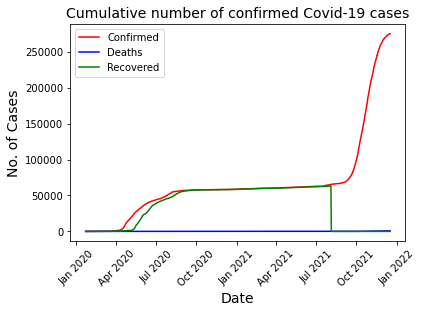

In [5]:
#Plot line chart
plt.plot(confirmed['Date'], confirmed['Cases'], color='red')
plt.plot(deaths['Date'], deaths['Cases'], color='blue')
plt.plot(recovered['Date'], recovered['Cases'], color='green')
plt.legend(["Confirmed","Deaths","Recovered"])
plt.title('Cumulative number of confirmed Covid-19 cases', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.ylabel('No. of Cases', fontsize=14)
plt.show()